In [58]:
import math
import numpy as np
import matplotlib.pyplot as plt
def make_lc(initial_cost, lr=.9, maxUnits=400, minUnits=1, numberOfLaunches=None):  #all figures in $ launch cost
    outputs = []
    for i in np.arange(minUnits, maxUnits):
        outputs.append(initial_cost * (lr ** math.log(i, 2))) #outputs.append(initial_cost * (i ** (math.log(lr, 10) / math.log(2, 10))))   equivalent formula
    if numberOfLaunches == None:
        print('Cost for Launch in Millions of $ ' + str(outputs[-1]))
        print('Cost per kg: ' +  str((outputs[-1] * 1000000) / 8300)) #capacity to GTO from https://www.spacex.com/vehicles/falcon-9/
    else:
        print('Cost per kg with ' + str(numberOfLaunches) + ' launches per first stage: ' +  str((outputs[-1] * 1000000) / 8300))
    return [np.arange(minUnits, maxUnits), np.array(outputs)]



Learning Rate: 0.9516951530106196
Cost for Launch in Millions of $ 40.42107982341968
Cost per kg: 4870.00961727948


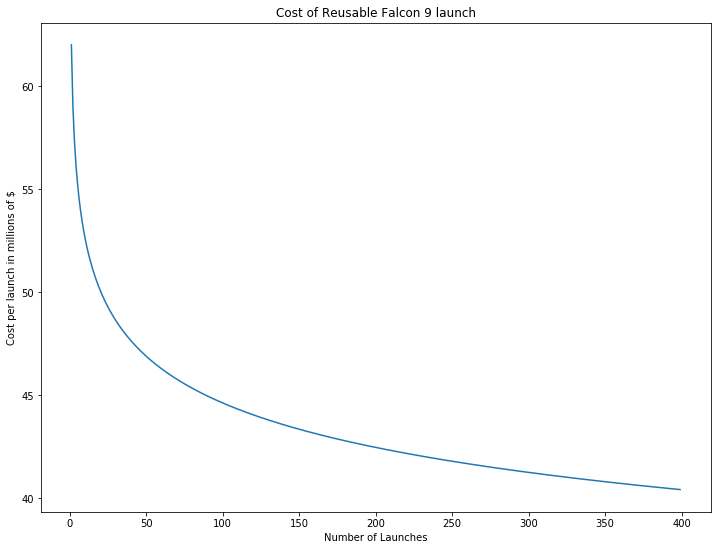

In [59]:
#very conservative inital estimate based on prices currently being charged
def show_curve(inputs=[[], []], title='Cost of Reusable Falcon 9 launch'): #deafualt arg to show shape of inputs, output of make_lc can be passed in directly
    fig = plt.figure(figsize=(12, 9))
    plt.plot(inputs[0], inputs[1])
    plt.title(title)
    plt.xlabel('Number of Launches')
    plt.ylabel('Cost per launch in millions of $')

initial_cost = 62
second_cost = ((57-15) / 14) + 13 + 15 #cost of reusable portion of rocket divided over 14 launches
lr = (second_cost/initial_cost) ** (1/14)

#plus development costs split over all launches plus cost of non-reusable portion, Source: 
print('Learning Rate:', lr)
show_curve(make_lc(62, lr=lr))

Learning Rate: 0.8209351265904078
Growth Rate for Launches Each Year: 0.2
Cost for Launch in Millions of $ 2.697329475429868
Cost per kg: 324.9794548710684


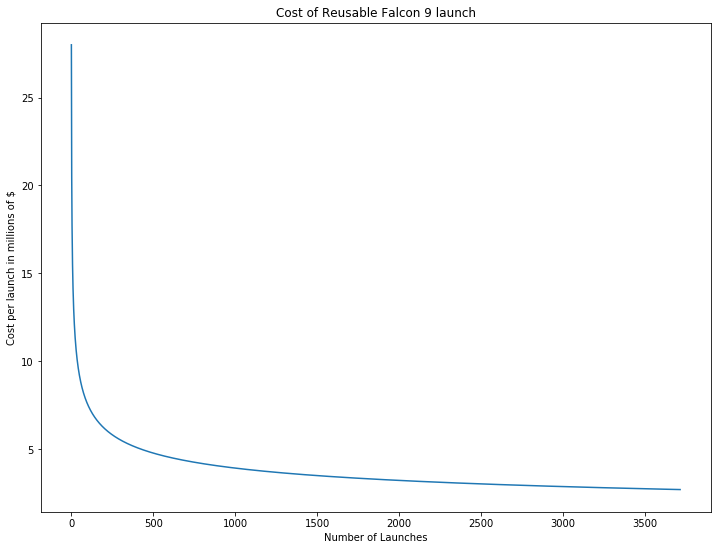

In [29]:
initial_cost_for_spaceX = 28 # reference: https://www.cnbc.com/2020/04/16/elon-musk-spacex-falcon-9-rocket-over-a-million-dollars-less-to-insure.html
second_cost2 = ((16.8) / 20) + 5.6 + 2.8 + 2.8 + 1 #cost of reusable portion of rocket divided over twenty launches
lr2 = (second_cost2/initial_cost_for_spaceX) ** (1/(15**(1/2)))
print('Learning Rate:', lr2)
launches_per_year = 20 * 3 #number of launches Musk wants to make * number of companies(SpaceX, ULA, Blue origin)
years = 10
launches = 0
growth_rate = .2
print('Growth Rate for Launches Each Year: ' + str(growth_rate))
for _ in range(years):
    launches += launches_per_year
    launches_per_year *= (1+growth_rate)
show_curve(make_lc(initial_cost_for_spaceX, lr=lr2, maxUnits=launches_per_year*years))


Cost per kg with 10 launches: 1443.3734939759033
Cost per kg with 100 launches: 1250.3614457831325


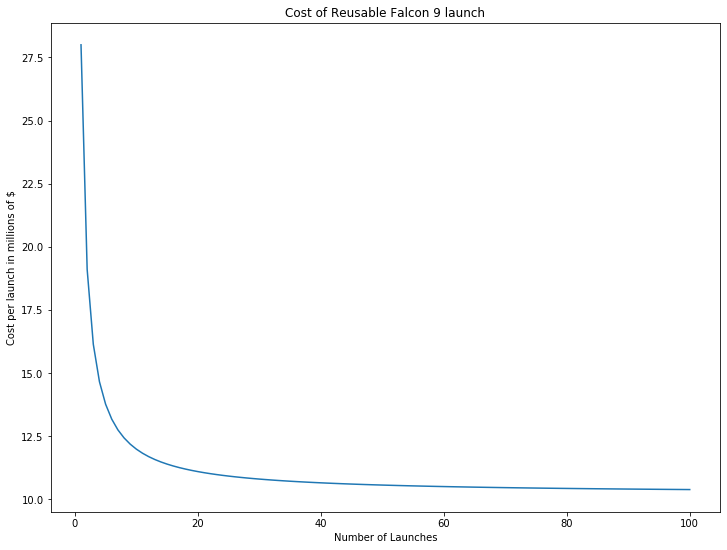

In [50]:
def reusability_only_model_f9(totalCost=28, costOfNonReusablePortion=10.2, minLaunches=1, maxLaunches=101, print_1000=False):
    outputs = []
    for i in np.arange(minLaunches, maxLaunches):
        outputs.append((totalCost-costOfNonReusablePortion) / i + costOfNonReusablePortion)  
    print('Cost per kg with 10 launches: ' +  str((outputs[9] * 1000000) / 8300)) #capacity to GTO from https://www.spacex.com/vehicles/falcon-9/
    print('Cost per kg with 100 launches: ' +  str((outputs[99] * 1000000) / 8300)) #capacity to GTO from https://www.spacex.com/vehicles/falcon-9/
    if print_1000:
        print('Cost per kg with 1000 launches: ' +  str((outputs[999] * 1000000) / 8300))
    return [np.arange(minLaunches, maxLaunches), np.array(outputs)]
    
show_curve(reusability_only_model_f9())

Cost per kg with 10 launches: 636.1445783132529
Cost per kg with 100 launches: 394.3373493975903
Cost per kg with 1000 launches: 370.1566265060241


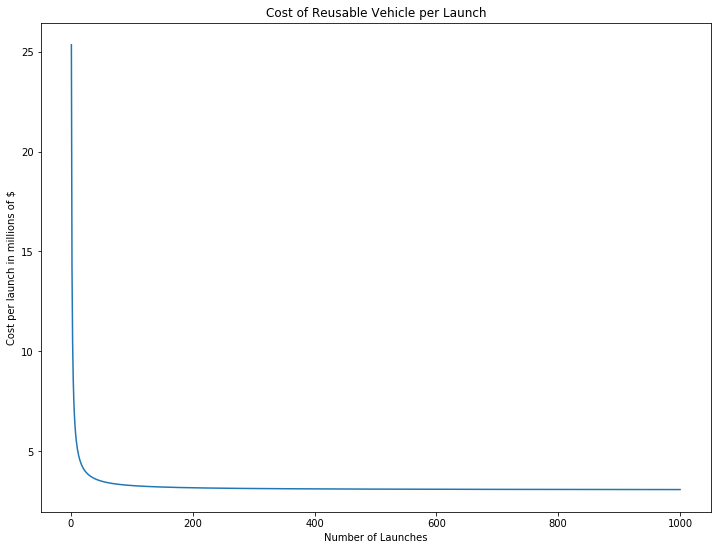

In [73]:
stage_1_and_fairings = 16.8 + 5.5
fuel_and_recovery = 2.8 + .25
show_curve(reusability_only_model_f9(totalCost=stage_1_and_fairings + fuel_and_recovery, costOfNonReusablePortion=fuel_and_recovery, maxLaunches=1001, print_1000=True), title='Cost of Reusable Vehicle per Launch')

Learning Rate 10 launches: 0.8342747410106838
Learning Rate 20 launches: 0.8209351265904078
Learning Rate 50 launches: 0.8126224819507064
Learning Rate 100 launches: 0.8097965368409931
Growth Rate for Launches Each Year: 0.2
Cost per kg with 10 launches per first stage: 393.4349769241302
Cost per kg with 20 launches per first stage: 324.9794548710684
Cost per kg with 50 launches per first stage: 288.0304562601151
Cost per kg with 100 launches per first stage: 276.37356085928377


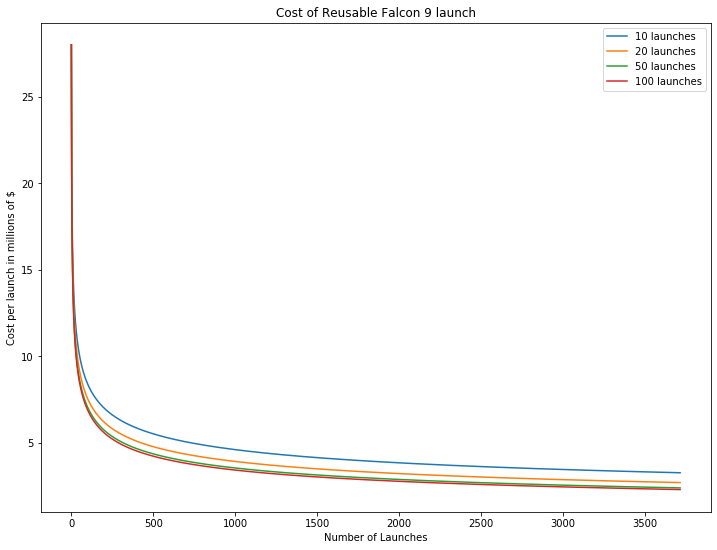

In [49]:
def show_multipule_lcs(inputs=[[[], []], [[], []]], title='Cost of Reusable Falcon 9 launch', labels=[]):
    fig = plt.figure(figsize=(12, 9))
    for i in range(len(inputs)):
        plt.plot(inputs[i][0], inputs[i][1], label=labels[i])
    plt.legend(loc="upper right")
    plt.title(title)
    plt.xlabel('Number of Launches')
    plt.ylabel('Cost per launch in millions of $')
    

initial_cost_for_spaceX = 28 # reference: https://www.cnbc.com/2020/04/16/elon-musk-spacex-falcon-9-rocket-over-a-million-dollars-less-to-insure.html

second_cost10 = ((16.8) / 10) + 5.6 + 2.8 + 2.8 + 1 #cost of reusable portion of rocket divided over twenty launches
lr10 = (second_cost10/initial_cost_for_spaceX) ** (1/(15**(1/2)))
print('Learning Rate 10 launches:', lr10)

second_cost20 = ((16.8) / 20) + 5.6 + 2.8 + 2.8 + 1 #cost of reusable portion of rocket divided over twenty launches
lr20 = (second_cost20/initial_cost_for_spaceX) ** (1/(15**(1/2)))
print('Learning Rate 20 launches:', lr20)

'''
second_cost30 = ((16.8) / 30) + 5.6 + 2.8 + 2.8 + 1 #cost of reusable portion of rocket divided over twenty launches
lr30 = (second_cost30/initial_cost_for_spaceX) ** (1/(15**(1/2)))
print('Learning Rate 10 launches:', lr30)
'''

second_cost50 = ((16.8) / 50) + 5.6 + 2.8 + 2.8 + 1 #cost of reusable portion of rocket divided over twenty launches
lr50 = (second_cost50/initial_cost_for_spaceX) ** (1/(15**(1/2)))
print('Learning Rate 50 launches:', lr50)

second_cost100 = ((16.8) / 100) + 5.6 + 2.8 + 2.8 + 1 #cost of reusable portion of rocket divided over twenty launches
lr100 = (second_cost100/initial_cost_for_spaceX) ** (1/(15**(1/2)))
print('Learning Rate 100 launches:', lr100)

launches_per_year = 20 * 3 #number of launches Musk wants to make * number of companies(SpaceX, ULA, Blue origin)
years = 10
launches = 0
growth_rate = .2
print('Growth Rate for Launches Each Year: ' + str(growth_rate))
for _ in range(years):
    launches += launches_per_year
    launches_per_year *= (1+growth_rate)
    

#c30launches = make_lc(initial_cost_for_spaceX, lr=lr30, maxUnits=launches_per_year*years)
c10launches = make_lc(initial_cost_for_spaceX, lr=lr10, maxUnits=launches_per_year*years, numberOfLaunches=10)
c20launches = make_lc(initial_cost_for_spaceX, lr=lr20, maxUnits=launches_per_year*years, numberOfLaunches=20)
c50launches = make_lc(initial_cost_for_spaceX, lr=lr50, maxUnits=launches_per_year*years, numberOfLaunches=50)
c100launches = make_lc(initial_cost_for_spaceX, lr=lr100, maxUnits=launches_per_year*years, numberOfLaunches=100)
show_multipule_lcs([c10launches, c20launches, c50launches, c100launches], labels=['10 launches', '20 launches', '50 launches', '100 launches'])

Cost per kg with 10 launches per first stage: 144.10032597420636
Cost per kg with 20 launches per first stage: 117.37973572733367
Cost per kg with 50 launches per first stage: 101.34738157921004
Cost per kg with 100 launches per first stage: 96.00326352983551


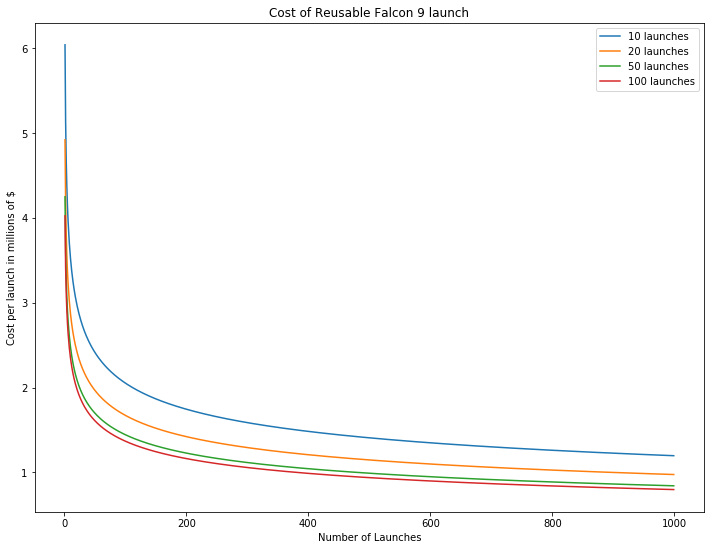

In [75]:
stage_1_and_fairings = 16.8 + 5.6
fuel_and_recovery = 2.8 + 1
initial_cost_10_launches = ((stage_1_and_fairings + fuel_and_recovery) - fuel_and_recovery) / 10 + fuel_and_recovery
initial_cost_20_launches = ((stage_1_and_fairings + fuel_and_recovery) - fuel_and_recovery) / 20 + fuel_and_recovery
initial_cost_50_launches = ((stage_1_and_fairings + fuel_and_recovery) - fuel_and_recovery) / 50 + fuel_and_recovery
initial_cost_100_launches = ((stage_1_and_fairings + fuel_and_recovery) - fuel_and_recovery) / 100 + fuel_and_recovery

c10launches = make_lc(initial_cost_10_launches, lr=.85, maxUnits=1000, numberOfLaunches=10)
c20launches = make_lc(initial_cost_20_launches, lr=.85, maxUnits=1000, numberOfLaunches=20)
c50launches = make_lc(initial_cost_50_launches, lr=.85, maxUnits=1000, numberOfLaunches=50)
c100launches = make_lc(initial_cost_100_launches, lr=.85, maxUnits=1000, numberOfLaunches=100)
show_multipule_lcs([c10launches, c20launches, c50launches, c100launches], labels=['10 launches', '20 launches', '50 launches', '100 launches'])